## <a id='toc1_1_'></a>[Occlude images](#toc0_)

This notebook illustrates how to use the functions contained in this repository. 

**Table of contents**<a id='toc0_'></a>    
- [Occlude images](#toc1_1_)    
    - [Input and output directories](#toc1_1_1_)    
    - [Using individual functions](#toc1_1_2_)    
    - [Using the general function](#toc1_1_3_)    
    - [Visualising the results](#toc1_1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [73]:
# import the necessary functions
from scripts.occlusion_funcs import partial_viewing
from scripts.occlusion_funcs import deletion
from scripts.occlusion_funcs import blobs
from scripts.occlusion_funcs import occlude
# import some useful packages
import glob
from cv2 import imread
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### <a id='toc1_1_1_'></a>[Input and output directories](#toc0_)

Start by showing where the input images are, and where the output images should go. By default, images will be written in `./outputs`, but that folder can be changed from within the functions.

In [10]:
# name the input and output directories
input_dir = './input_images'
output_dir = './outputs'
print(f'There are {len(glob.glob(input_dir + "/*"))} image(s) in the input directory.')

There are 8 image(s) in the input directory


### <a id='toc1_1_2_'></a>[Using individual functions](#toc0_)

Images can be occluded using one of the three smaller occluding functions: `blobs`, `deletion` and `partial_viewing`.

In [11]:
### First way: use individual manipulation functions
# for blobs
blobs(
    input_dir,
    easy=10,
    hard=50,
    many_small=True,
    out_root='./blobs_output',
    col=255 # setting the color of the blobs to white
)
# for deletion
deletion(
    input_dir,
    easy=40,
    hard=70,
    few_large=True
)
# for partial viewing
partial_viewing(
    input_dir,
    easy=20,
    hard=90, # making the hard condition very challenging
    many_small=False, # only producing few large aperture images
    few_large=True, 
    seed=10
)

STEP: Manipulation: blobs, occlusion size: manysmall, level: low ...DONE!
STEP: Manipulation: blobs, occlusion size: manysmall, level: high ...DONE!
STEP: Manipulation: blobs, occlusion size: manysmall, level: control ...DONE!
STEP: Manipulation: deletion, occlusion size: fewlarge, level: low ...DONE!
STEP: Manipulation: deletion, occlusion size: fewlarge, level: high ...DONE!
STEP: Manipulation: partialviewing, occlusion size: fewlarge, level: low ...DONE!
STEP: Manipulation: partialviewing, occlusion size: fewlarge, level: high ...DONE!
STEP: Manipulation: partialviewing, occlusion size: fewlarge, level: control ...DONE!


### <a id='toc1_1_3_'></a>[Using the general function](#toc0_)

The general function assembles all three ways of occluding images. It takes in similar arguments to the individual functions.

In [ ]:
### Second way: use the general occlude function

occlude(
    input_dir,
    easy=30,
    hard=55,
    apply_blobs=True, # each manipulation type can be selected or not
    apply_deletion=False,
    apply_partialviewing=True,
    many_small=True, # each occlusion size can be selected or not
    few_large=False,
    col=0,
    out_root=output_dir,
    seed=42
)

### <a id='toc1_1_4_'></a>[Visualising the results](#toc0_)

Here are some example results from each of the functions ran above.

In [135]:
### Choose the example object category to work with
# Example object include:  banana, bus, cat, bird, fire hydrant, tree, person, building
category = 'bus'

### List the images to visualise
list_img = []
occlude(input_dir, apply_blobs=True, apply_deletion=True, apply_partialviewing=True, many_small=True, few_large=True, seed = np.random.randint(0,1000))
for t_o in {'deletion', 'blobs', 'partial_viewing'}:
    for s_o in {'fewlarge', 'manysmall'}:
        for diff in {'high', 'low'}:
            list_img.append(f'{output_dir}/{t_o}/{s_o}/{diff}/{s_o}_{t_o}_{diff}_{category}.png')

STEP: Manipulation: deletion, occlusion size: manysmall, level: low ...DONE!
STEP: Manipulation: deletion, occlusion size: manysmall, level: high ...DONE!
STEP: Manipulation: deletion, occlusion size: fewlarge, level: low ...DONE!
STEP: Manipulation: deletion, occlusion size: fewlarge, level: high ...DONE!
STEP: Manipulation: partialviewing, occlusion size: manysmall, level: low ...DONE!
STEP: Manipulation: partialviewing, occlusion size: manysmall, level: high ...DONE!
STEP: Manipulation: partialviewing, occlusion size: manysmall, level: control ...DONE!
STEP: Manipulation: partialviewing, occlusion size: fewlarge, level: low ...DONE!
STEP: Manipulation: partialviewing, occlusion size: fewlarge, level: high ...DONE!
STEP: Manipulation: partialviewing, occlusion size: fewlarge, level: control ...DONE!
STEP: Manipulation: blobs, occlusion size: manysmall, level: low ...DONE!
STEP: Manipulation: blobs, occlusion size: manysmall, level: high ...DONE!
STEP: Manipulation: blobs, occlusion s

(-0.5, 699.5, 699.5, -0.5)

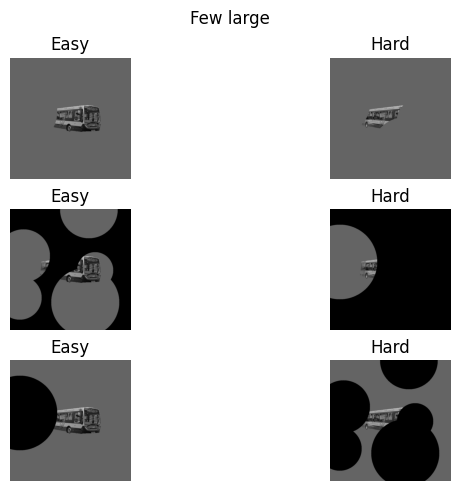

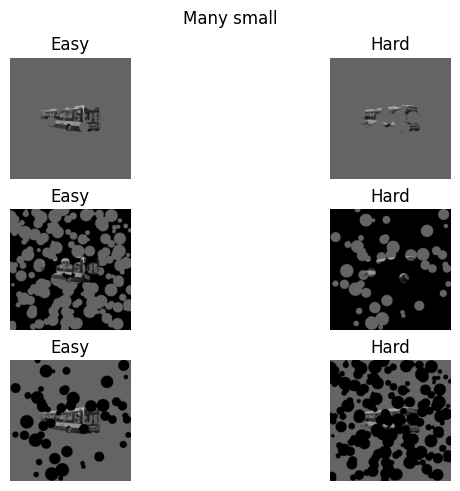

In [152]:
### Visualise the results
fig, axes = plt.subplots(3, 2, constrained_layout=True)
fig.suptitle('Few large')
### Few large
# Deletion results
axes[0,0].imshow(imread(list_img[1]), cmap = 'gray')
axes[0,0].set_title('Easy')
axes[0,0].axis('off')
axes[0,1].imshow(imread(list_img[0]), cmap = 'gray')
axes[0,1].set_title('Hard')
axes[0,1].axis('off')
# Partial viewing results
axes[1,0].imshow(imread(list_img[4]), cmap = 'gray')
axes[1,0].set_title('Easy')
axes[1,0].axis('off')
axes[1,1].imshow(imread(list_img[5]), cmap = 'gray')
axes[1,1].set_title('Hard')
axes[1,1].axis('off')
# Blobs results
axes[2,0].imshow(imread(list_img[9]), cmap = 'gray')
axes[2,0].set_title('Easy')
axes[2,0].axis('off')
axes[2,1].imshow(imread(list_img[8]), cmap = 'gray')
axes[2,1].set_title('Hard')
axes[2,1].axis('off')

fig, axes = plt.subplots(3, 2, constrained_layout=True)
fig.suptitle('Many small')
### Few large
# Deletion results
axes[0,0].imshow(imread(list_img[3]), cmap = 'gray')
axes[0,0].set_title('Easy')
axes[0,0].axis('off')
axes[0,1].imshow(imread(list_img[2]), cmap = 'gray')
axes[0,1].set_title('Hard')
axes[0,1].axis('off')
# Partial viewing results
axes[1,0].imshow(imread(list_img[6]), cmap = 'gray')
axes[1,0].set_title('Easy')
axes[1,0].axis('off')
axes[1,1].imshow(imread(list_img[7]), cmap = 'gray')
axes[1,1].set_title('Hard')
axes[1,1].axis('off')
# Blobs results
axes[2,0].imshow(imread(list_img[11]), cmap = 'gray')
axes[2,0].set_title('Easy')
axes[2,0].axis('off')
axes[2,1].imshow(imread(list_img[10]), cmap = 'gray')
axes[2,1].set_title('Hard')
axes[2,1].axis('off')